Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Retrieve Datasets as Dataframes

In [59]:
df_2024 = pd.read_csv('Dataset Generation (2024) (Responses) - Form Responses 1.csv')
df_fardina = pd.read_csv('Dataset Generation (Fardina) (Responses) - Form Responses 1.csv')
df_max = pd.read_csv('Dataset Generation (Max) (Responses) - Form Responses 1.csv')

Initial Clean of Each Dataframe & Merge

In [60]:
df_2024.drop_duplicates(inplace=True)
df_fardina.drop_duplicates(inplace=True)
df_max.drop_duplicates(inplace=True)

df_2024.dropna(inplace=True)
df_fardina.dropna(inplace=True)
df_max.dropna(inplace=True)

Secondary Clean & Merge Fardina & Max -> 2023 Dataframe

In [91]:
df_fardina = df_fardina[df_fardina['How old are you?'] != '50+']
df_max = df_max[df_max['How old are you?'] != '50+']
df_fardina['How old are you?'] = df_fardina['How old are you?'].apply(func=lambda x: int(x))
df_max['How old are you?'] = df_max['How old are you?'].apply(func=lambda x: int(x))

short_cols = ['Time', 'Year', 'Age', 'Politics of Parents', 'Politics of Self', 'Spirituality', 'Gender', 'Q1: Ignored Knee Pain', 'Q2: Rejected Aisle Walk', 'Q3: Trust Fund Split 50/50', 'Q4: Schooling Seperate Finances', 'Q5: Lost Cat, No Reward', 'Q6: Surprisig Child Drop-Off', 'Q7: Business Class Over Kids', 'Q8: Single Parent, Four Kids', 'Q9: Split Spouse Child Support', 'Q10: Expensive School, Cheap Career', 'Q11: Ex Wedding Invitation Revoked', 'Q12: Relatives Unapprove Wedding', 'Q13: Pregnant Wife, No Drinks', 'Q14: Rejected Dyed Hair']  

if 'Would you describe yourself as compassionate?' in df_fardina.columns:
    del df_fardina['Would you describe yourself as compassionate?']
    
fardina_cols = df_fardina.columns.to_list()
max_cols = df_max.columns.to_list()
fardina_col_mapping = dict(zip(fardina_cols, short_cols))
max_col_mapping = dict(zip(max_cols, short_cols))

df_fardina_final = df_fardina.rename(columns=fardina_col_mapping)
df_max_final = df_max.rename(columns=max_col_mapping)

df_2023_final = pd.concat([df_fardina_final, df_max_final])

df_2023_final

/var/folders/rz/twm3nfx14_379nlt_mj5qb3w0000gn/T/ipykernel_36514/2627966081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fardina['How old are you?'] = df_fardina['How old are you?'].apply(func=lambda x: int(x))


,Time,Year,Age,Politics of Parents,Politics of Self,Spirituality,Gender,Q1: Ignored Knee Pain,Q2: Rejected Aisle Walk,Q3: Trust Fund Split 50/50,...,"Q5: Lost Cat, No Reward",Q6: Surprisig Child Drop-Off,Q7: Business Class Over Kids,"Q8: Single Parent, Four Kids",Q9: Split Spouse Child Support,"Q10: Expensive School, Cheap Career",Q11: Ex Wedding Invitation Revoked,Q12: Relatives Unapprove Wedding,"Q13: Pregnant Wife, No Drinks",Q14: Rejected Dyed Hair
0,9/23/2023 18:01:01,Junior,20,Mildly conservative,Mildly conservative,Not spiritual at all,Male,Strongly a jerk,Mildly a jerk,Strongly a jerk,...,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Mildly a jerk
1,9/23/2023 18:01:08,Junior,20,Mildly liberal,Mildly liberal,Not spiritual at all,Male,Mildly a jerk,Mildly a jerk,Strongly a jerk,...,Mildly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk
2,9/23/2023 18:08:57,Junior,20,Mildly conservative,Mildly conservative,Somewhat spiritual,Male,Not a jerk,Not a jerk,Mildly a jerk,...,Not a jerk,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk
3,9/23/2023 18:09:57,Senior,22,Mildly liberal,Mildly liberal,Not spiritual at all,Famale,Mildly a jerk,Not a jerk,Not a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk
5,9/23/2023 18:10:13,Other,25,Mildly conservative,Mildly conservative,Not spiritual at all,Male,Mildly a jerk,Not a jerk,Not a jerk,...,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,10/12/2023 15:52:02,Junior,19,Strongly liberal,Strongly conservative,Not spiritual at all,Female,Not a jerk,Mildly a jerk,Strongly a jerk,...,Strongly a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,Strongly a jerk
95,10/17/2023 1:47:30,Junior,20,Strongly conservative,Mildly conservative,Somewhat spiritual,Male,Mildly a jerk,Not a jerk,Not a jerk,...,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk
98,10/24/2023 19:08:45,Junior,20,Mildly conservative,Neutral,Strongly spiritual,Female,Not a jerk,Not a jerk,Mildly a jerk,...,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk
99,10/26/2023 2:30:15,Junior,20,Mildly liberal,Strongly liberal,Somewhat spiritual,Male,Not a jerk,Mildly a jerk,Strongly a jerk,...,Mildly a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk


Secondary Clean 2024 Dataframe

In [92]:
str_replace = lambda s: s.replace('religious', 'spiritual') if isinstance(s, str) else s
df_2024['How would you rate your religiousness?'] = df_2024['How would you rate your religiousness?'].apply(func=str_replace)

df_2024['How old are you?'] = df_2024['How old are you?'].apply(func=lambda x: int(x))

d2024_cols = df_2024.columns.to_list()
d2024_col_mapping = dict(zip(d2024_cols, short_cols))
df_2024_final = df_2024.rename(columns=d2024_col_mapping)

df_2024_final

,Time,Year,Age,Politics of Parents,Politics of Self,Spirituality,Gender,Q1: Ignored Knee Pain,Q2: Rejected Aisle Walk,Q3: Trust Fund Split 50/50,...,"Q5: Lost Cat, No Reward",Q6: Surprisig Child Drop-Off,Q7: Business Class Over Kids,"Q8: Single Parent, Four Kids",Q9: Split Spouse Child Support,"Q10: Expensive School, Cheap Career",Q11: Ex Wedding Invitation Revoked,Q12: Relatives Unapprove Wedding,"Q13: Pregnant Wife, No Drinks",Q14: Rejected Dyed Hair
0,9/17/2024 9:28:55,Junior,19,Mildly conservative,Strongly liberal,Somewhat spiritual,Male,Not a jerk,Mildly a jerk,Strongly a jerk,...,Mildly a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk
1,9/17/2024 9:29:12,Junior,19,Neutral,Mildly liberal,Strongly spiritual,Male,Not a jerk,Not a jerk,Mildly a jerk,...,Not a jerk,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Mildly a jerk
2,9/17/2024 9:29:22,Sophmore,18,Don't know / It's complicated,Don't know / It's complicated,Not spiritual at all,Male,Not a jerk,Not a jerk,Not a jerk,...,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk
4,9/17/2024 9:30:06,Sophmore,19,Mildly liberal,Mildly liberal,Somewhat spiritual,Female,Not a jerk,Not a jerk,Mildly a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk
5,9/17/2024 9:30:21,Junior,18,Mildly conservative,Mildly liberal,Not spiritual at all,Non-binary / other,Not a jerk,Not a jerk,Strongly a jerk,...,Mildly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,9/18/2024 21:34:10,Graduate Student,21,Don't know / It's complicated,Mildly liberal,Somewhat spiritual,Male,Not a jerk,Strongly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk
126,9/18/2024 22:40:26,Junior,20,Neutral,Neutral,Somewhat spiritual,Male,Not a jerk,Not a jerk,Not a jerk,...,Strongly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk
127,9/18/2024 23:06:25,Senior,21,Mildly conservative,Mildly conservative,Somewhat spiritual,Male,Not a jerk,Not a jerk,Not a jerk,...,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Strongly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Not a jerk
128,9/18/2024 23:26:38,Graduate Student,28,Neutral,Neutral,Somewhat spiritual,Male,Not a jerk,Mildly a jerk,Mildly a jerk,...,Not a jerk,Strongly a jerk,Strongly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk


Merge 2023 & 2024 -> Combined Dataframe

In [93]:
df_all = pd.concat([df_2023_final, df_2024_final])

df_all

,Time,Year,Age,Politics of Parents,Politics of Self,Spirituality,Gender,Q1: Ignored Knee Pain,Q2: Rejected Aisle Walk,Q3: Trust Fund Split 50/50,...,"Q5: Lost Cat, No Reward",Q6: Surprisig Child Drop-Off,Q7: Business Class Over Kids,"Q8: Single Parent, Four Kids",Q9: Split Spouse Child Support,"Q10: Expensive School, Cheap Career",Q11: Ex Wedding Invitation Revoked,Q12: Relatives Unapprove Wedding,"Q13: Pregnant Wife, No Drinks",Q14: Rejected Dyed Hair
0,9/23/2023 18:01:01,Junior,20,Mildly conservative,Mildly conservative,Not spiritual at all,Male,Strongly a jerk,Mildly a jerk,Strongly a jerk,...,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Mildly a jerk
1,9/23/2023 18:01:08,Junior,20,Mildly liberal,Mildly liberal,Not spiritual at all,Male,Mildly a jerk,Mildly a jerk,Strongly a jerk,...,Mildly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk
2,9/23/2023 18:08:57,Junior,20,Mildly conservative,Mildly conservative,Somewhat spiritual,Male,Not a jerk,Not a jerk,Mildly a jerk,...,Not a jerk,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk
3,9/23/2023 18:09:57,Senior,22,Mildly liberal,Mildly liberal,Not spiritual at all,Famale,Mildly a jerk,Not a jerk,Not a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk
5,9/23/2023 18:10:13,Other,25,Mildly conservative,Mildly conservative,Not spiritual at all,Male,Mildly a jerk,Not a jerk,Not a jerk,...,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,9/18/2024 21:34:10,Graduate Student,21,Don't know / It's complicated,Mildly liberal,Somewhat spiritual,Male,Not a jerk,Strongly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk
126,9/18/2024 22:40:26,Junior,20,Neutral,Neutral,Somewhat spiritual,Male,Not a jerk,Not a jerk,Not a jerk,...,Strongly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk
127,9/18/2024 23:06:25,Senior,21,Mildly conservative,Mildly conservative,Somewhat spiritual,Male,Not a jerk,Not a jerk,Not a jerk,...,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Strongly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Not a jerk
128,9/18/2024 23:26:38,Graduate Student,28,Neutral,Neutral,Somewhat spiritual,Male,Not a jerk,Mildly a jerk,Mildly a jerk,...,Not a jerk,Strongly a jerk,Strongly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk


In [96]:
df_all.to_csv(path_or_buf='Dataset All.csv')

In [119]:
selected_cols = ['Politics of Self', 'Spirituality', 'Gender', 'Q1: Ignored Knee Pain', 'Q2: Rejected Aisle Walk', 'Q3: Trust Fund Split 50/50', 'Q4: Schooling Seperate Finances', 'Q5: Lost Cat, No Reward', 'Q6: Surprisig Child Drop-Off', 'Q7: Business Class Over Kids', 'Q8: Single Parent, Four Kids', 'Q9: Split Spouse Child Support', 'Q10: Expensive School, Cheap Career', 'Q11: Ex Wedding Invitation Revoked', 'Q12: Relatives Unapprove Wedding', 'Q13: Pregnant Wife, No Drinks', 'Q14: Rejected Dyed Hair']  
df_analysis = df_all[selected_cols]

df_analysis

,Politics of Self,Spirituality,Gender,Q1: Ignored Knee Pain,Q2: Rejected Aisle Walk,Q3: Trust Fund Split 50/50,Q4: Schooling Seperate Finances,"Q5: Lost Cat, No Reward",Q6: Surprisig Child Drop-Off,Q7: Business Class Over Kids,"Q8: Single Parent, Four Kids",Q9: Split Spouse Child Support,"Q10: Expensive School, Cheap Career",Q11: Ex Wedding Invitation Revoked,Q12: Relatives Unapprove Wedding,"Q13: Pregnant Wife, No Drinks",Q14: Rejected Dyed Hair
0,Mildly conservative,Not spiritual at all,Male,Strongly a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Mildly a jerk
1,Mildly liberal,Not spiritual at all,Male,Mildly a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk
2,Mildly conservative,Somewhat spiritual,Male,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk
3,Mildly liberal,Not spiritual at all,Famale,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk
5,Mildly conservative,Not spiritual at all,Male,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Mildly liberal,Somewhat spiritual,Male,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk
126,Neutral,Somewhat spiritual,Male,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Strongly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk
127,Mildly conservative,Somewhat spiritual,Male,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Strongly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Not a jerk
128,Neutral,Somewhat spiritual,Male,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk


In [124]:
contingency_tables = []

for i in range(7, len(short_cols[7:])+7):
    contingency_tables.append(pd.crosstab(df_analysis['Politics of Self'], df_analysis[short_cols[i]]))

In [130]:
from scipy.stats import chi2_contingency

i = 1
for ct in contingency_tables:
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"Q{i}\t|\tChi-square statistic: {chi2}, p-value: {p}, Degrees of freedom: {dof}")
    i+=1

Q1	|	Chi-square statistic: 6.274802602611494, p-value: 0.7916712687060764, Degrees of freedom: 10
Q2	|	Chi-square statistic: 16.156458641231243, p-value: 0.0952403313002315, Degrees of freedom: 10
Q3	|	Chi-square statistic: 19.56415397633113, p-value: 0.03365525145724682, Degrees of freedom: 10
Q4	|	Chi-square statistic: 10.0292116844714, p-value: 0.43793419048543436, Degrees of freedom: 10
Q5	|	Chi-square statistic: 9.98094435713461, p-value: 0.44216669666904806, Degrees of freedom: 10
Q6	|	Chi-square statistic: 5.130989285149243, p-value: 0.8822576778826763, Degrees of freedom: 10
Q7	|	Chi-square statistic: 24.24752810305331, p-value: 0.006969795030863645, Degrees of freedom: 10
Q8	|	Chi-square statistic: 17.970776287554052, p-value: 0.05545860936918624, Degrees of freedom: 10
Q9	|	Chi-square statistic: 10.277290115246622, p-value: 0.41651183874638925, Degrees of freedom: 10
Q10	|	Chi-square statistic: 12.420215808713628, p-value: 0.25791666969442356, Degrees of freedom: 10
Q11	|	Chi

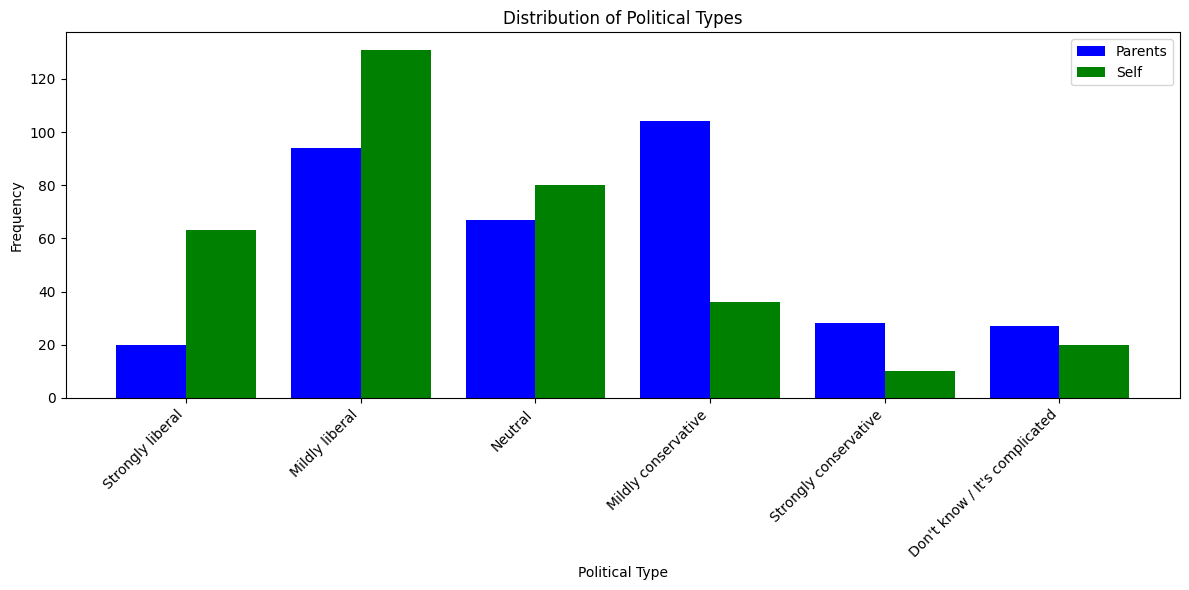

In [97]:
political_order = ['Strongly liberal', 'Mildly liberal', 'Neutral', 'Mildly conservative', 'Strongly conservative', 'Don\'t know / It\'s complicated']

# Convert the columns to categorical types with the defined order
df_all['Politics of Parents'] = pd.Categorical(df_all['Politics of Parents'], categories=political_order, ordered=True)
df_all['Politics of Self'] = pd.Categorical(df_all['Politics of Self'], categories=political_order, ordered=True)

# Get the value counts for both 'PoliticalTypeOfParents' and 'PoliticalTypeOfSelf'
parents_counts = df_all['Politics of Parents'].value_counts(sort=False)
self_counts = df_all['Politics of Self'].value_counts(sort=False)

# Set up the figure
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Define the positions for the groups
index = np.arange(len(political_order))

# Plot bars 
plt.bar(index - bar_width/2, parents_counts, bar_width, label='Parents', color='blue')
plt.bar(index + bar_width/2, self_counts, bar_width, label='Self', color='green')

# Customize the plot
plt.xticks(index, political_order, rotation=45, ha='right')
plt.xlabel('Political Type')
plt.ylabel('Frequency')
plt.title('Distribution of Political Types')
plt.legend()
plt.tight_layout()

plt.show()